In [147]:
from graph_traffic.config import project_path
import pandas as pd
import pickle

training_folder = f"{project_path}/training_history/regression"
training_datetime = "20220525_083624"

with open(f"{training_folder}/{training_datetime}_meteo_values.pkl", "rb") as f:
    meteo_values = pickle.load(f)

with open(f"{training_folder}/{training_datetime}_temporal_values.pkl", "rb") as f:
    temporal_values = pickle.load(f)

with open(f"{training_folder}/{training_datetime}_results.pkl", "rb") as f:
    results = pickle.load(f)

with open(f"{training_folder}/{training_datetime}_times.pkl", "rb") as f:
    training_time = pickle.load(f)

with open(f"{training_folder}/{training_datetime}_alphas.pkl", "rb") as f:
    alphas = pickle.load(f)

In [148]:
meteo_values

{0: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity': 'passthrough',
  'pressure': 'passthrough',
  'radiation': 'passthrough'},
 1: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity': 'passthrough',
  'pressure': 'passthrough',
  'radiation': 'drop'},
 2: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity': 'passthrough',
  'pressure': 'drop',
  'radiation': 'passthrough'},
 3: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity': 'passthrough',
  'pressure': 'drop',
  'radiation': 'drop'},
 4: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity': 'drop',
  'pressure': 'passthrough',
  'radiation': 'passthrough'},
 5: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity': 'drop',
  'pressure': 'passthrough',
  'radiation': 'drop'},
 6: {'rain': 'one_hot',
  'wind': 'xy',
  'temperature': 'passthrough',
  'humidity

In [149]:
temporal_values

{0: {'year': 'passthrough',
  'season': 'one_hot',
  'month': 'passthrough',
  'day_of_month': 'passthrough',
  'weekday': 'passthrough',
  'hour': 'passthrough',
  'minute': 'passthrough',
  'bank_holiday': 'passthrough',
  'school_holiday': 'passthrough',
  'working_day': 'passthrough'},
 100: {'year': 'passthrough',
  'season': 'one_hot',
  'month': 'passthrough',
  'day_of_month': 'passthrough',
  'weekday': 'passthrough',
  'hour': 'drop',
  'minute': 'passthrough',
  'bank_holiday': 'drop',
  'school_holiday': 'passthrough',
  'working_day': 'passthrough'},
 200: {'year': 'passthrough',
  'season': 'one_hot',
  'month': 'passthrough',
  'day_of_month': 'passthrough',
  'weekday': 'one_hot',
  'hour': 'spline',
  'minute': 'drop',
  'bank_holiday': 'passthrough',
  'school_holiday': 'passthrough',
  'working_day': 'passthrough'},
 300: {'year': 'passthrough',
  'season': 'one_hot',
  'month': 'passthrough',
  'day_of_month': 'passthrough',
  'weekday': 'drop',
  'hour': 'fourier',

In [150]:
def mean_loss(l):
    mae = [x[0] for x in l]
    mre = [x[1] for x in l]
    return sum(mae)/len(mae), sum(mre)/len(mre)

In [151]:
results_summary = {k: mean_loss(l) for (k, l) in results.items()}
mae = pd.Series({k: v[0] for (k, v) in results_summary.items()})
mre = pd.Series({k: v[1] for (k, v) in results_summary.items()})

In [152]:
mae.sort_values()

15  80800     543.858515
6   63200     544.075831
30  73600     544.094485
31  80800     544.103625
22  63200     544.435632
                ...     
16  78300    4046.962897
    24300    4071.136246
17  51300    4101.991493
    78300    4130.384240
    24300    4148.847618
Length: 42930, dtype: float64

<AxesSubplot:>

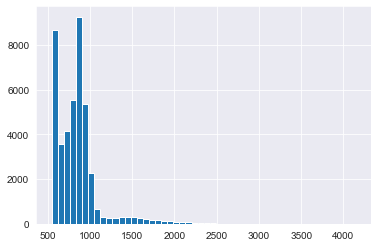

In [153]:
mae.hist(bins=50)

In [154]:
temporal_values[63200]

{'year': 'one_hot',
 'season': 'ordinal',
 'month': 'passthrough',
 'day_of_month': 'passthrough',
 'weekday': 'one_hot',
 'hour': 'spline',
 'minute': 'drop',
 'bank_holiday': 'passthrough',
 'school_holiday': 'passthrough',
 'working_day': 'passthrough'}

In [155]:
meteo_values[6]

{'rain': 'one_hot',
 'wind': 'xy',
 'temperature': 'passthrough',
 'humidity': 'drop',
 'pressure': 'drop',
 'radiation': 'passthrough'}

In [156]:
meteo_values[7]

{'rain': 'one_hot',
 'wind': 'xy',
 'temperature': 'passthrough',
 'humidity': 'drop',
 'pressure': 'drop',
 'radiation': 'drop'}

In [157]:
meteo_values[15]

{'rain': 'one_hot',
 'wind': 'xy',
 'temperature': 'drop',
 'humidity': 'drop',
 'pressure': 'drop',
 'radiation': 'drop'}

In [158]:
meteo_values[16]

{'rain': 'one_hot',
 'wind': 'wind_speed',
 'temperature': 'passthrough',
 'humidity': 'passthrough',
 'pressure': 'passthrough',
 'radiation': 'passthrough'}

In [159]:
meteo_values[31]

{'rain': 'one_hot',
 'wind': 'wind_speed',
 'temperature': 'drop',
 'humidity': 'drop',
 'pressure': 'drop',
 'radiation': 'drop'}

<AxesSubplot:>

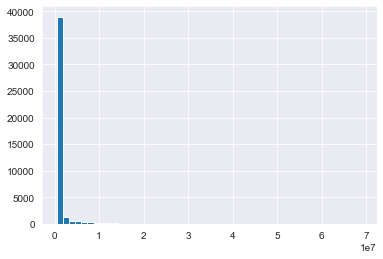

In [160]:
pd.Series(mre).hist(bins=50)

In [161]:
training_time

{(0, 0): 0.1329023838043213,
 (0, 100): 0.050362348556518555,
 (0, 200): 0.06899333000183105,
 (0, 300): 0.0468597412109375,
 (0, 400): 0.19398164749145508,
 (0, 500): 0.11586427688598633,
 (0, 600): 0.11587142944335938,
 (0, 700): 0.12078237533569336,
 (0, 800): 0.072509765625,
 (0, 900): 0.08001947402954102,
 (0, 1000): 0.1158590316772461,
 (0, 1100): 0.0690004825592041,
 (0, 1200): 0.09856867790222168,
 (0, 1300): 0.08033347129821777,
 (0, 1400): 0.10867524147033691,
 (0, 1500): 0.04021739959716797,
 (0, 1600): 0.13149094581604004,
 (0, 1700): 0.05337667465209961,
 (0, 1800): 0.07248139381408691,
 (0, 1900): 0.05338144302368164,
 (0, 2000): 0.08465099334716797,
 (0, 2100): 0.05337047576904297,
 (0, 2200): 0.20035576820373535,
 (0, 2300): 0.17131805419921875,
 (0, 2400): 0.13088345527648926,
 (0, 2500): 0.1329021453857422,
 (0, 2600): 0.08460831642150879,
 (0, 2700): 0.08462262153625488,
 (0, 2800): 0.10626411437988281,
 (0, 2900): 0.0942392349243164,
 (0, 3000): 0.10676050186157227,

In [162]:
alphas

{(0, 0): [10.0, 10.0, 10.0],
 (0, 100): [10.0, 10.0, 10.0],
 (0, 200): [10.0, 10.0, 10.0],
 (0, 300): [1.0, 10.0, 10.0],
 (0, 400): [10.0, 10.0, 10.0],
 (0, 500): [10.0, 10.0, 10.0],
 (0, 600): [10.0, 10.0, 10.0],
 (0, 700): [10.0, 10.0, 10.0],
 (0, 800): [10.0, 10.0, 10.0],
 (0, 900): [1.0, 10.0, 10.0],
 (0, 1000): [10.0, 10.0, 10.0],
 (0, 1100): [10.0, 10.0, 10.0],
 (0, 1200): [10.0, 10.0, 10.0],
 (0, 1300): [10.0, 10.0, 10.0],
 (0, 1400): [10.0, 10.0, 10.0],
 (0, 1500): [1.0, 1.0, 10.0],
 (0, 1600): [10.0, 10.0, 10.0],
 (0, 1700): [10.0, 10.0, 10.0],
 (0, 1800): [10.0, 10.0, 10.0],
 (0, 1900): [10.0, 10.0, 10.0],
 (0, 2000): [10.0, 10.0, 10.0],
 (0, 2100): [1.0, 10.0, 10.0],
 (0, 2200): [10.0, 10.0, 10.0],
 (0, 2300): [10.0, 10.0, 10.0],
 (0, 2400): [10.0, 10.0, 10.0],
 (0, 2500): [10.0, 10.0, 10.0],
 (0, 2600): [10.0, 10.0, 10.0],
 (0, 2700): [1.0, 10.0, 10.0],
 (0, 2800): [10.0, 10.0, 10.0],
 (0, 2900): [10.0, 10.0, 10.0],
 (0, 3000): [10.0, 10.0, 10.0],
 (0, 3100): [10.0, 10.0, 1